# 0. Project Introduction

**Purpose**
- Analysing instagram accounts data to make model which can attact suspicious accounts(Bot,Spam,Scam)


**Data**
- Total: aroun 15,000 of infulencer's accounts(Real, Bot, Scam, Spam)
- COllected Parameter: number of followers, number of followings, number of posts, presence of bio, profile picture, external link, etc.

**Analysis Procedure**
1. Data exploration and preprocessing (EDA)  
2. Exploratory analysis of key features and rule-based condition testing  
3. Feature analysis based on ratios and binary variables  
4. Classification model development and comparison (e.g., Random Forest)  
5. Interpretation of results and insight extraction



# 1. Data Preprocessing

## 1.1 Data Loading 

- Import data, check for row/column counts, variable types, and missing values.


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  


# 한글 그래프 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("LIMFADD.csv")

# Basic data summary
print("data size:", df.shape)
display(df.head())
display(df.describe(include='all'))
display(df.info())
display(df.isnull().sum())


data size: (15000, 11)


,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
0,2,2757,1378.5,0,0,N,N,N,0,N,Bot
1,2,505,252.5,0,0,N,Yes,N,0,N,Scam
2,6786,1782,0.262599469,1589,6051.040404,yes,N,Yes,10,N,Real
3,21,1281,61,0,0,N,Yes,N,0,N,Bot
4,585,1682,2.875213675,2663,926.1920333,yes,N,N,12,Yes,Real


,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
count,15000.000000,15000.000000,15000,15000.000000,15000,15000,15000,15000,15000.000000,15000,15000
unique,NaN,NaN,12709,NaN,11591,3,2,2,NaN,2,4
top,NaN,NaN,#DIV/0!,NaN,0,N,N,N,NaN,N,Bot
freq,NaN,NaN,562,NaN,1854,8640,7546,11217,NaN,11208,3750
mean,23397.378933,1385.350000,NaN,427.830200,NaN,NaN,NaN,NaN,3.011733,NaN,NaN
std,41920.419061,1600.823163,NaN,678.889037,NaN,NaN,NaN,NaN,4.203313,NaN,NaN
min,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,6.000000,369.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,48.000000,725.500000,NaN,4.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,19535.250000,1747.000000,NaN,578.250000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Followers            15000 non-null  int64 
 1   Following            15000 non-null  int64 
 2   Following/Followers  15000 non-null  object
 3   Posts                15000 non-null  int64 
 4   Posts/Followers      15000 non-null  object
 5   Bio                  15000 non-null  object
 6   Profile Picture      15000 non-null  object
 7   External Link        15000 non-null  object
 8   Mutual Friends       15000 non-null  int64 
 9   Threads              15000 non-null  object
 10  Labels               15000 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.3+ MB


None

Followers              0
Following              0
Following/Followers    0
Posts                  0
Posts/Followers        0
Bio                    0
Profile Picture        0
External Link          0
Mutual Friends         0
Threads                0
Labels                 0
dtype: int64

**▶Summary**

- No missing values → no need for cleansing 
- `Following/Followers`, `Posts/Followers`are converted to numeric formats


## 1.2 Data Cleaning and Encoding

>- Convert ratio columns to numeric types
>- Encode binary columns(yes/N → 1/0)  
>- Map label strings to numerical codes for ML


In [104]:
# Convert ratio columns
df['Following/Followers'] = pd.to_numeric(df['Following/Followers'], errors='coerce')
df['Posts/Followers'] = pd.to_numeric(df['Posts/Followers'], errors='coerce')

# Binary encoding: yes, N → 1, 0
df['Bio_bin'] = df['Bio'].apply(lambda x: 1 if str(x).strip().lower() in ['yes', 'y'] else 0)
df['ProfilePic_bin'] = df['Profile Picture'].apply(lambda x: 1 if str(x).strip().lower() in ['yes', 'y'] else 0)
df['ExternalLink_bin'] = df['External Link'].apply(lambda x: 1 if str(x).strip().lower() in ['yes', 'y'] else 0)

# Label encoding
label_map = {'Bot': 0, 'Spam': 1, 'Scam': 2, 'Real': 3}
df['Labels'] = df['Labels'].astype(str).str.strip().str.capitalize()
df['Label_code'] = df['Labels'].map(label_map)

# Check lavel distribution
print(df['Label_code'].value_counts(dropna=False))



Label_code
0    3750
2    3750
3    3750
1    3750
Name: count, dtype: int64


In [105]:
# Encoding Preview
df[['Followers', 'Following', 'Following/Followers', 'Bio_bin', 'ProfilePic_bin', 'ExternalLink_bin', 'Label_code']].head()


,Followers,Following,Following/Followers,Bio_bin,ProfilePic_bin,ExternalLink_bin,Label_code
0,2,2757,1378.500000,0,0,0,0
1,2,505,252.500000,0,1,0,2
2,6786,1782,0.262599,1,0,1,3
3,21,1281,61.000000,0,1,0,0
4,585,1682,2.875214,1,0,0,3


**▶Summary**

- `Following/Followers`, `Posts/Followers`are converted to floats
- `Bio`, `Profile Picture`, `External Link' are encoded as 0/1
- Label column is encoded from string to integar

## 1.3 Feature Engineering

>- Create new derived features useful for model training

In [106]:

df['Follow_Ratio'] = df['Followers'] / (df['Following'] + 1)  # 0으로 나눔 방지
df['Post_Ratio'] = df['Posts'] / (df['Followers'] + 1)
df['NoBio'] = (df['Bio'] == 'N').astype(int)  # 'N'으로 표시된 경우를 결측으로 간주
df['NoProfilePic'] = (df['Profile Picture'] == 'N').astype(int)
df['NoPosts'] = (df['Posts'] == 0).astype(int)


# 2. EDA (Exploratory Data Analysis)

> Analyzing visually the distribution of key features and their relationships to account tupes.


## 2.1 Followers

>- The number of followers is a key indicator of a influencer's influence (Reach).


▶ Mean Followers by Label:
 Labels
Spam    82585.02
Real    10976.94
Bot        24.08
Scam        3.47
Name: Followers, dtype: float64

▶ Median Followers by Label:
 Labels
Bot        24.0
Real    11030.5
Scam        3.0
Spam    82387.0
Name: Followers, dtype: float64


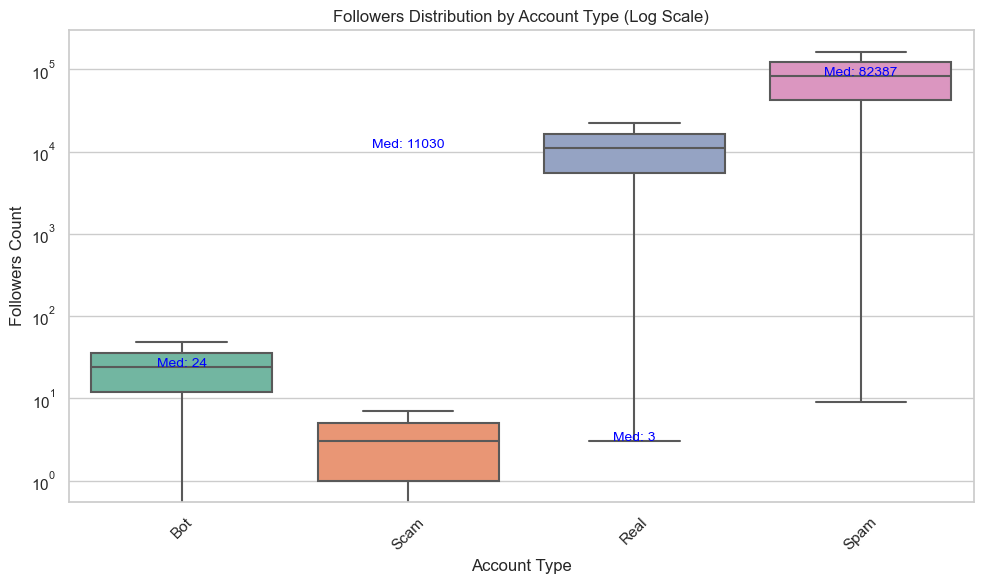

In [107]:
# Average& Median
mean_vals = df.groupby('Labels')['Followers'].mean().sort_values(ascending=False)
median_vals = df.groupby('Labels')['Followers'].median()

print("▶ Mean Followers by Label:\n", mean_vals.round(2))
print("\n▶ Median Followers by Label:\n", median_vals)

# Boxplot (log scale)
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Labels',
    y='Followers',
    data=df,
    palette='Set2'
)

#show median
for i, label in enumerate(median_vals.index):
    plt.text(i, median_vals[label], f'Med: {int(median_vals[label])}', 
             ha='center', color='blue', fontsize=10)

plt.title("Followers Distribution by Account Type (Log Scale)")
plt.xlabel("Account Type")
plt.ylabel("Followers Count")
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2.2 BIO Presence
>- Does having a Bio influence the account label?


In [108]:
def plot_binary_feature_by_label(df, col, true_val='Yes', false_val='N', title=None):
    """
    Visualizes binary feature presence (e.g., Bio, External Link) by Label.
    """
    bin_col = f'{col}_bin'
    df[bin_col] = df[col].apply(lambda x: 1 if str(x).strip().lower() == true_val.lower() else 0)

    # Print Proportion
    print(f"\n▶ Proportion of accounts with {col} by Label:")
    print(df.groupby('Labels')[bin_col].mean().round(3))

    # visualize
    plt.figure(figsize=(10,6))
    sns.countplot(x='Labels', hue=bin_col, data=df, palette='Set3')
    plt.title(title or f"{col} Presence by Label")
    plt.xlabel("Account Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title=col, labels=[f"No {col}", f"Has {col}"])
    plt.tight_layout()
    plt.show()


- Bots: 100% have no bio — strong indication of automation.
- Scam and Spam: About 49% have no bio.
- Real users: More likely to have a bio (only 31% lack it).
- Bio presence is a useful signal to distinguish real from fake accounts.


▶ Proportion of accounts with Bio by Label:
Labels
Bot     0.000
Real    0.683
Scam    0.507
Spam    0.506
Name: Bio_bin, dtype: float64


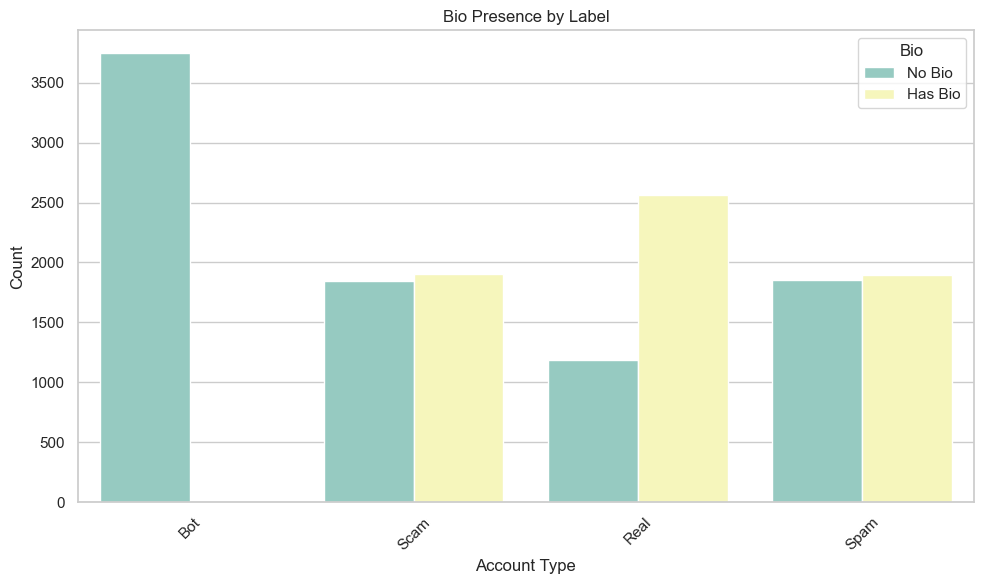

In [109]:

plot_binary_feature_by_label(df, col='Bio', title='Bio Presence by Label')


## 2.3 External Link



▶ Proportion of accounts with External Link by Label:
Labels
Bot     0.000
Real    0.493
Scam    0.000
Spam    0.516
Name: External Link_bin, dtype: float64


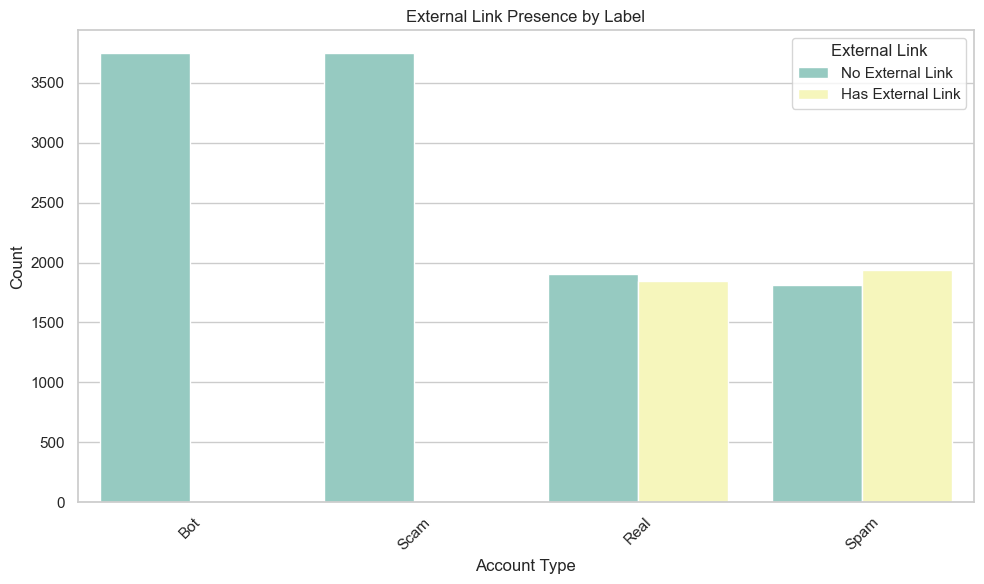

In [110]:
plot_binary_feature_by_label(df, col='External Link', title='External Link Presence by Label')


- Bots and Scams: 100% have no external link.
- Real: About 50% include a link.
- External link presence may indicate legitimacy or business use.

## 2.4 Profile Picture


▶ Proportion of accounts with Profile Picture by Label:
Labels
Bot     0.482
Real    0.494
Scam    0.499
Spam    0.513
Name: Profile Picture_bin, dtype: float64


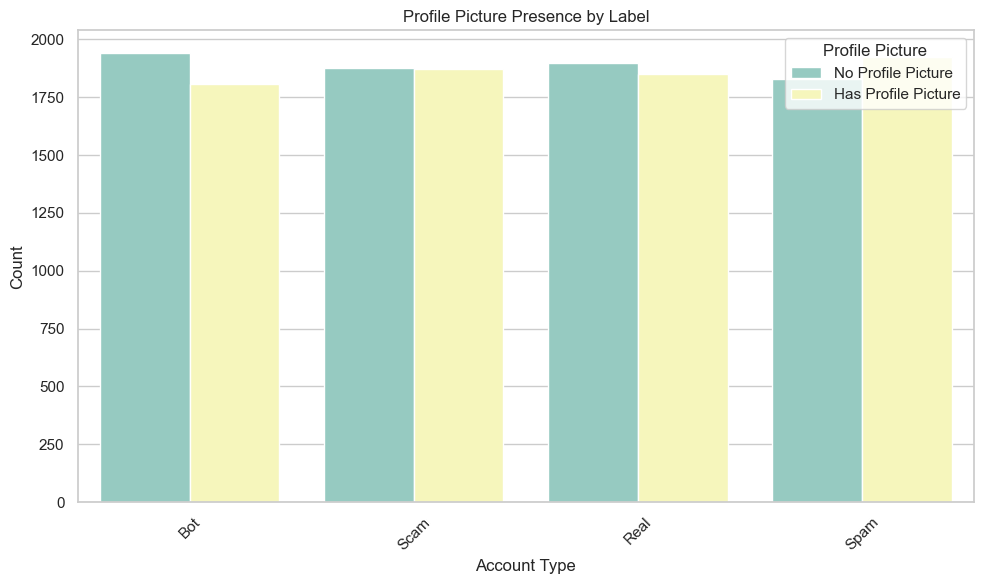

In [111]:
plot_binary_feature_by_label(df, col='Profile Picture', title='Profile Picture Presence by Label')

- No major differences by label (roughly 50% in all types).
- Slightly more Bots lack profile pictures.
- Less useful as a signal than Bio or Link.

## 2.5 Following Count

▶ Mean Following by Label:
 Labels
Bot     3473.52
Real    1144.92
Spam     535.98
Scam     386.98
Name: Following, dtype: float64


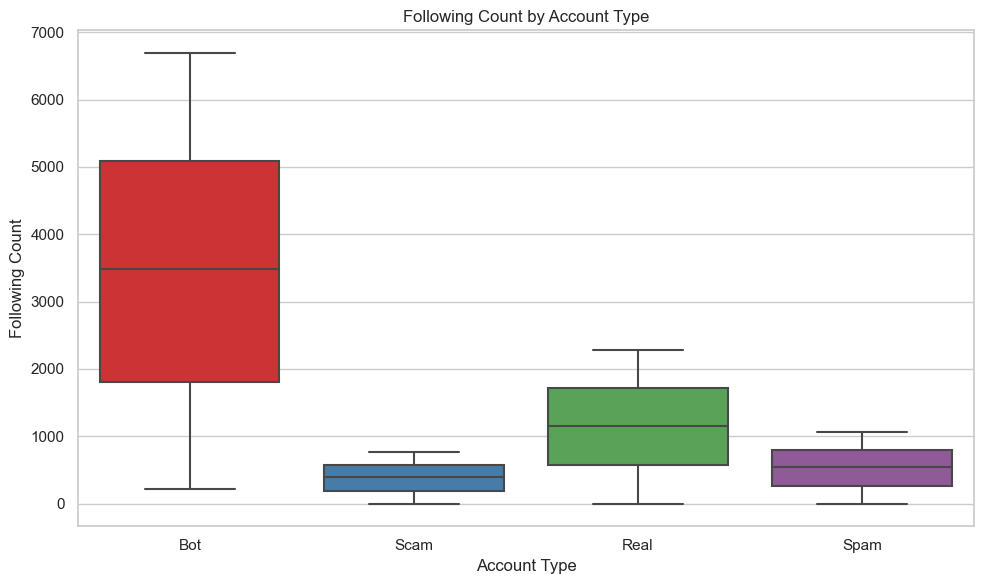

In [112]:
mean_following = df.groupby('Labels')['Following'].mean().sort_values(ascending=False)
print("▶ Mean Following by Label:\n", mean_following.round(2))

plt.figure(figsize=(10,6))
sns.boxplot(x='Labels', y='Following', data=df, palette='Set1')
plt.title("Following Count by Account Type")
plt.xlabel("Account Type")
plt.ylabel("Following Count")
plt.tight_layout()
plt.show()


- The following number is one of the most powerful single variables in bot detection
- Real, Scam, and Spam are much less than Bot, which follows 3473 people on average
- When used under heuristic conditions, accounts that follow more than 3000 people are at high risk



## 2.6 Posts Count

>Posts count shows Activity Level


▶ Mean Posts by Label:
 Labels
Real    1341.82
Spam     366.45
Scam       2.04
Bot        1.01
Name: Posts, dtype: float64


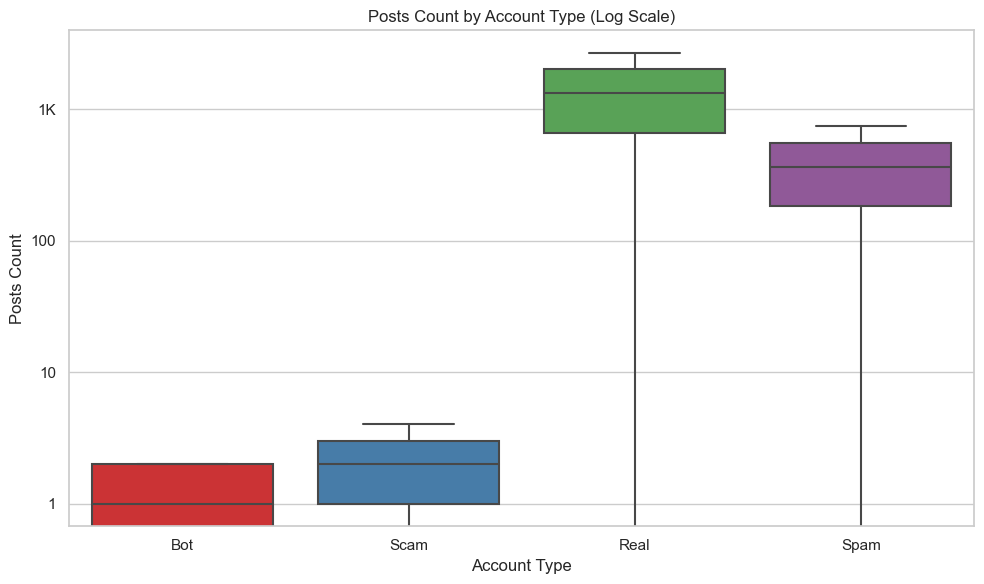

In [113]:

mean_posts = df.groupby('Labels')['Posts'].mean().sort_values(ascending=False)
print("\n▶ Mean Posts by Label:\n", mean_posts.round(2))

plt.figure(figsize=(10,6))
sns.boxplot(x='Labels', y='Posts', data=df, palette='Set1')
plt.title("Posts Count by Account Type (Log Scale)")
plt.xlabel("Account Type")
plt.ylabel("Posts Count")
plt.yscale('log')
plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1K'])
plt.tight_layout()
plt.show()

# 3. Heuristic-Based Detection

> In this section, we explore specific combinations of account conditions that may indicate suspicious or low-quality behavior.
- 목적: 의심스러운 계정을 규칙으로 걸러본다.
- 방법: Bio 없음, 사진 없음 등 조건들을 조합해서 새로운 열을 만들고 분포를 본다.

## 3.1 Accounts with No Bio and No Profile Picture

>Accounts lacking both a bio and a profile picture may indicate lower credibility or engagement.


In [114]:
# Function: Define heuristic rule-based conditions
def define_heuristic_conditions(df):
    df['NoBio'] = (df['Bio'] == 'N').astype(int)
    df['NoProfilePic'] = (df['Profile Picture'] == 'N').astype(int)
    df['NoPosts'] = (df['Posts'] == 0).astype(int)
    
    # Combined heuristic conditions
    df['NoBio_NoPic'] = ((df['NoBio'] == 1) & (df['NoProfilePic'] == 1)).astype(int)
    df['HighFollowing_NoBio'] = ((df['Following'] >= df['Following'].quantile(0.75)) & (df['NoBio'] == 1)).astype(int)
    df['NoPosts_NoBio'] = ((df['NoPosts'] == 1) & (df['NoBio'] == 1)).astype(int)
    return df

# Function: Analyze and visualize each heuristic condition
def condition_analysis(df, condition_col, condition_desc):
    condition_df = df[df[condition_col] == 1]
    if condition_df.empty:
        print(f"\n⚠️ '{condition_desc}': No accounts meet the condition.")
        return
    
    # Label distribution within accounts meeting the condition
    label_ratio = condition_df['Labels'].value_counts(normalize=True)
    
     # Proportion of each label that meets the condition
    cross_tab = pd.crosstab(df['Labels'], df[condition_col], normalize='index')

    print(f"\n--- Analysis for: {condition_desc} ---")
    print("[Precision-Focused] Label distribution within accounts satisfying the condition:")
    print(label_ratio)
    print("\n[Behavior-Focused] Percentage of each label that satisfies the condition:")
    print(cross_tab)
      
    # Dual visualization
    plt.figure(figsize=(14, 5))
    
    # Precision-focused bar plot
    plt.subplot(1, 2, 1)
    label_ratio.plot(kind='bar', color='skyblue')
    plt.title(f'{condition_desc}\n(Precision-focused)', fontsize=13)
    plt.ylabel('Ratio')
    plt.ylim(0, 1)

    # Behavior-focused bar plot
    plt.subplot(1, 2, 2)
    cross_tab[1].plot(kind='bar', color='coral')
    plt.title(f'{condition_desc}\n(Behavior-focused)', fontsize=13)
    plt.ylabel('Ratio')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()



--- Analysis for: NoBio + NoProfilePic (Passive Bot Detection) ---
[Precision-Focused] Label distribution within accounts satisfying the condition:
Labels
Bot     0.445720
Spam    0.210925
Scam    0.206335
Real    0.137021
Name: proportion, dtype: float64

[Behavior-Focused] Percentage of each label that satisfies the condition:
NoBio_NoPic         0         1
Labels                         
Bot          0.482133  0.517867
Real         0.840800  0.159200
Scam         0.760267  0.239733
Spam         0.754933  0.245067


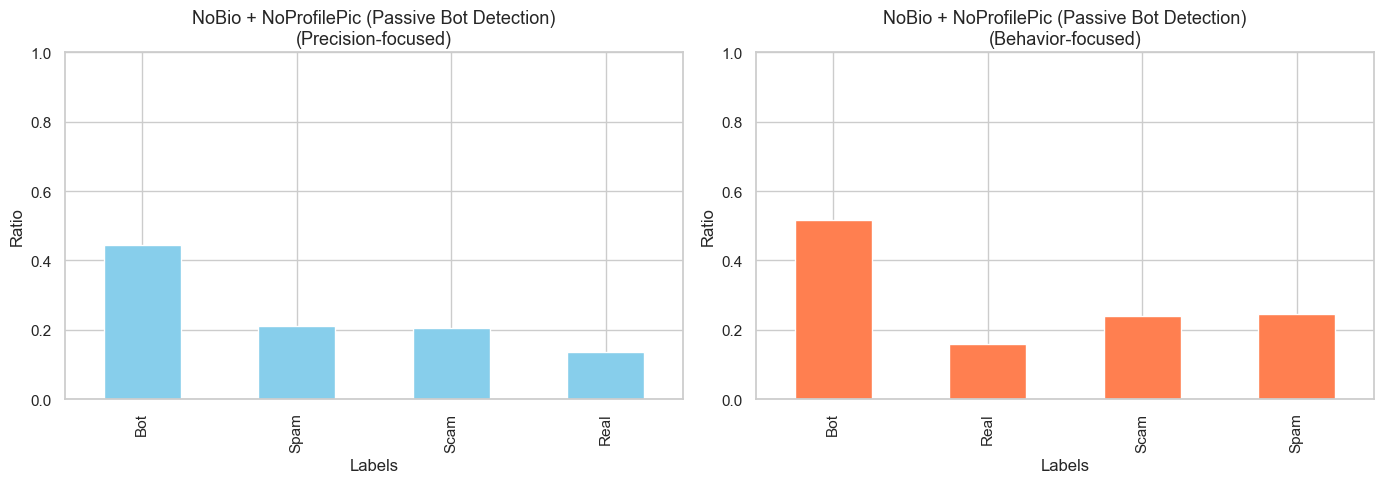


--- Analysis for: HighFollowing + NoBio (Follow-Spam Bot Detection) ---
[Precision-Focused] Label distribution within accounts satisfying the condition:
Labels
Bot     0.910391
Real    0.089609
Name: proportion, dtype: float64

[Behavior-Focused] Percentage of each label that satisfies the condition:
HighFollowing_NoBio       0       1
Labels                             
Bot                  0.2360  0.7640
Real                 0.9248  0.0752
Scam                 1.0000  0.0000
Spam                 1.0000  0.0000


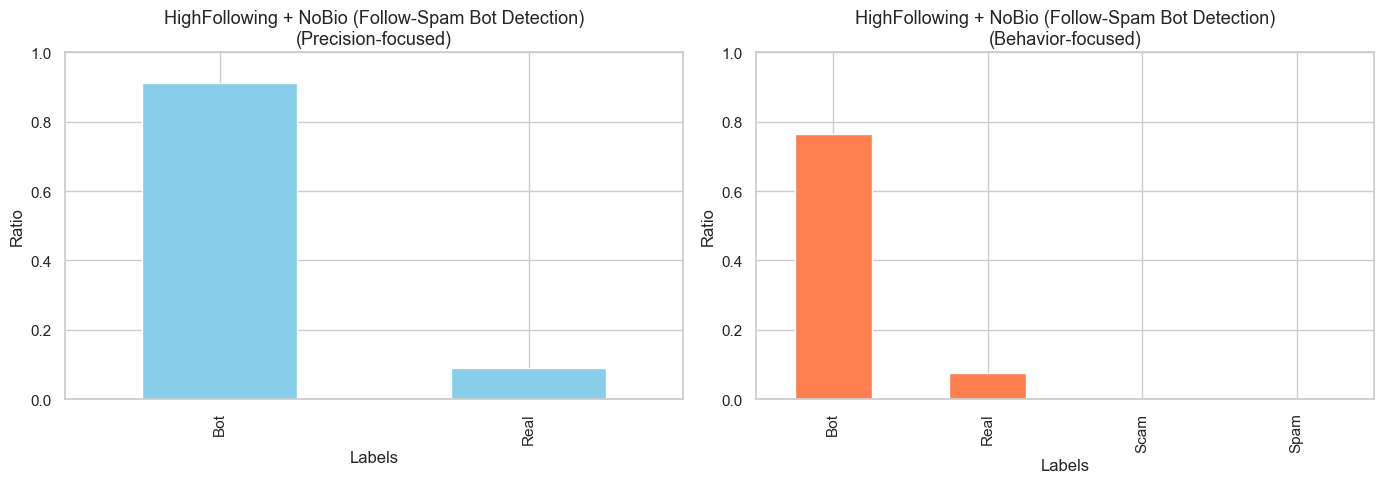


--- Analysis for: NoPosts + NoBio (Empty Shell Account Detection) ---
[Precision-Focused] Label distribution within accounts satisfying the condition:
Labels
Bot     0.768942
Scam    0.228554
Spam    0.001879
Real    0.000626
Name: proportion, dtype: float64

[Behavior-Focused] Percentage of each label that satisfies the condition:
NoPosts_NoBio         0         1
Labels                           
Bot            0.672533  0.327467
Real           0.999733  0.000267
Scam           0.902667  0.097333
Spam           0.999200  0.000800


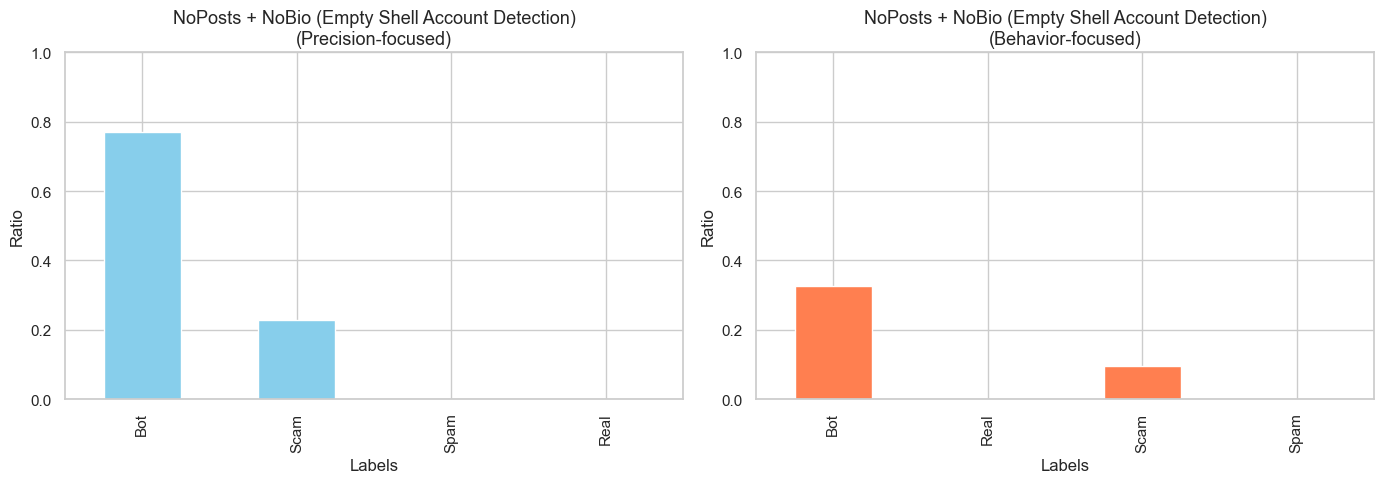

In [115]:
# Define all heuristic flags
df = define_heuristic_conditions(df)

# Run heuristic condition analyses
condition_analysis(df, 'NoBio_NoPic', 'NoBio + NoProfilePic (Passive Bot Detection)')
condition_analysis(df, 'HighFollowing_NoBio', 'HighFollowing + NoBio (Follow-Spam Bot Detection)')
condition_analysis(df, 'NoPosts_NoBio', 'NoPosts + NoBio (Empty Shell Account Detection)')


# 4. Ratio Feature Analysis

> Derived ratio-based variables are useful in detecting account authenticity and behavioral outliers.


## 4.1 Feature Creation

> We derive two normalized behavioral ratios:

In [116]:
df['Follow_Ratio'] = df['Following'] / (df['Followers'] + 1)
df['Post_Ratio'] = df['Posts'] / (df['Followers'] + 1)

## 4-2. Ratio Comparison by Label

In [117]:
print(df.groupby('Labels')['Follow_Ratio'].mean())

Labels
Bot     311.515567
Real      0.548129
Scam    133.808929
Spam      0.031891
Name: Follow_Ratio, dtype: float64


## 4-3. Follow_Ratio 

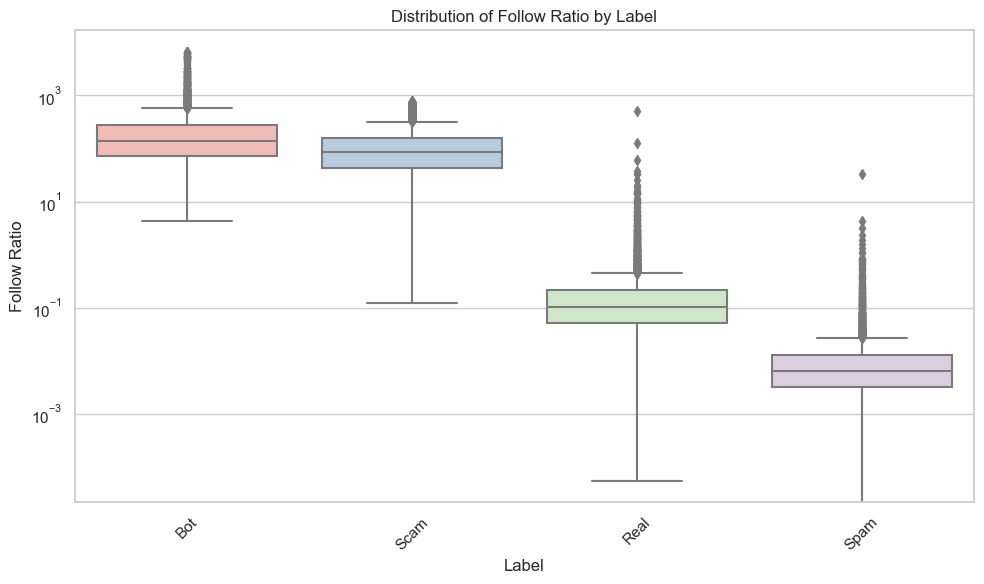

In [118]:
# Follow_Ratio visualisation(log scale)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Labels', y='Follow_Ratio', data=df, palette='Pastel1')
plt.yscale('log')  
plt.title('Distribution of Follow Ratio by Label')
plt.xlabel('Label')
plt.ylabel('Follow Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## 4.4 Post_Ratio 

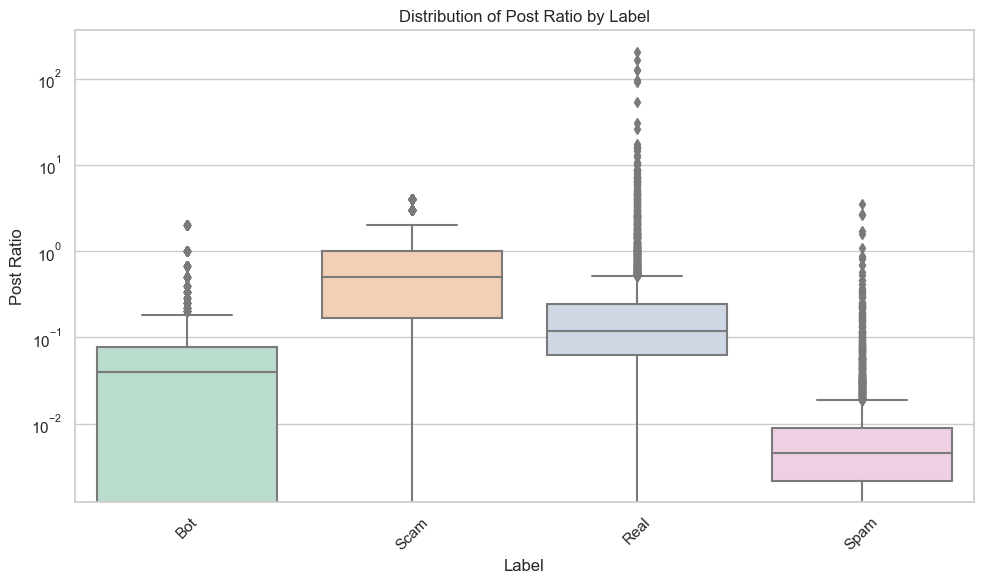

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Labels', y='Post_Ratio', data=df, palette='Pastel2')
plt.yscale('log')  
plt.title('Distribution of Post Ratio by Label')
plt.xlabel('Label')
plt.ylabel('Post Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.5 Outlier Detection

In [120]:
# Follow_Ratio 
high_follow_ratio = df[df['Follow_Ratio'] > 100]
print("\n▶ Number of accounts with Follow_Ratio > 100:", len(high_follow_ratio))
print(high_follow_ratio[['Labels', 'Follow_Ratio']].head())

# Post_Ratio 
high_post_ratio = df[df['Post_Ratio'] > 10]
print("\n▶ Number of accounts with Post_Ratio > 10:", len(high_post_ratio))
print(high_post_ratio[['Labels', 'Post_Ratio']].head())





▶ Number of accounts with Follow_Ratio > 100: 4018
  Labels  Follow_Ratio
0    Bot    919.000000
1   Scam    168.333333
5   Scam    753.000000
7   Scam    150.800000
8    Bot    202.681818

▶ Number of accounts with Post_Ratio > 10: 21
     Labels  Post_Ratio
378    Real   13.149485
996    Real   10.482993
1316   Real  127.500000
2707   Real   10.037209
3833   Real  206.400000


- 4,018 accounts have `Follow_Ratio > 100` → mostly Bots and Scams
- 21 accounts have `Post_Ratio > 10` → mostly Real (potential micro-influencers)

# 5. Ratio Feature Analysis

> To understand behavioral patterns of each account type (Real, Bot, Scam, Spam), we computed mean values of core features.

## 5.1 Raw Mean Heatmap: Absolute behavior differences


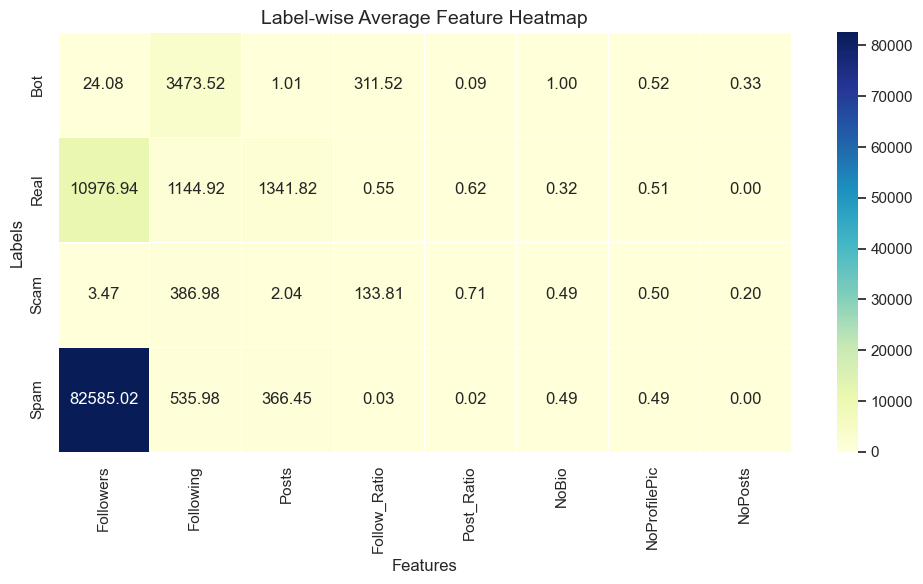

In [121]:
profile_features = ['Followers', 'Following', 'Posts', 'Follow_Ratio', 'Post_Ratio', 'NoBio', 'NoProfilePic', 'NoPosts']
label_profile = df.groupby('Labels')[profile_features].mean().round(2)


plt.figure(figsize=(10, 6))
sns.heatmap(label_profile, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title("Label-wise Average Feature Heatmap", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Labels")
plt.tight_layout()
plt.show()


## Auxiliary visualization: heatmaps for extreme value correction

>Followers, Followings, Posts, etc. have large differences in the size of their values, especially when extreme values exist, such as the Spam label, the original heatmap rarely shows any other characteristic values.

>Therefore, we will create additional heatmaps as shown below, which will give you a more balanced view of the relative patterns between the **labels.

### 1) Log-Transformed Heatmap

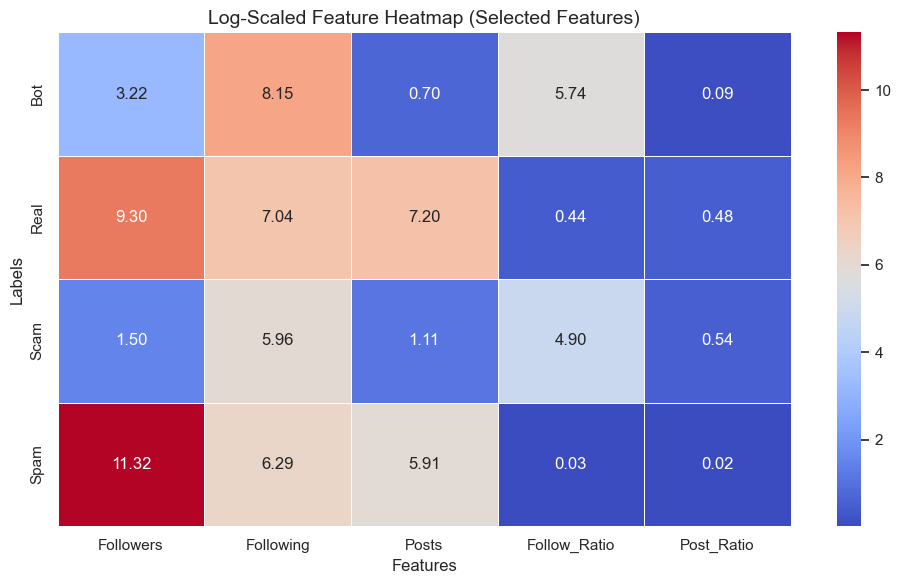

In [122]:
log_features = ['Followers', 'Following', 'Posts', 'Follow_Ratio', 'Post_Ratio']
log_profile = label_profile[log_features].applymap(lambda x: np.log1p(x))

plt.figure(figsize=(10, 6))
sns.heatmap(log_profile, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Log-Scaled Feature Heatmap (Selected Features)", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Labels")
plt.tight_layout()
plt.show()


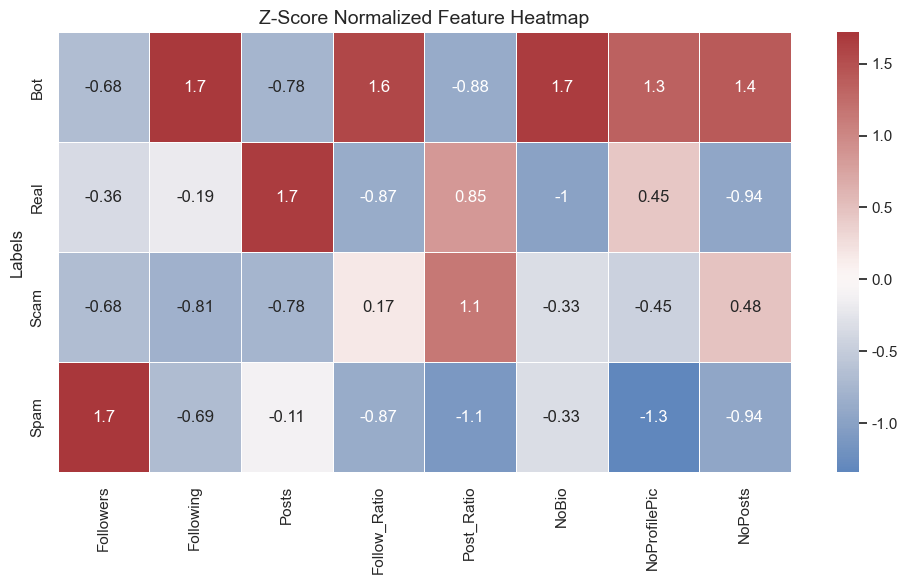

In [123]:
from sklearn.preprocessing import StandardScaler

# Normalization
scaler = StandardScaler()
scaled = scaler.fit_transform(label_profile)
scaled_df = pd.DataFrame(scaled, index=label_profile.index, columns=label_profile.columns)

# Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(scaled_df, annot=True, cmap='vlag', linewidths=0.5, center=0)
plt.title("Z-Score Normalized Feature Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


**▶ 관찰 포인트:**
> - Bot: Following 수 비정상적으로 많음, Post 거의 없음
> - Real: 높은 Followers와 Posts → 활발한 계정
>- Scam: 적은 수치지만 Follow Ratio는 매우 높음 → 의심
>- Spam: Followers 수치가 비정상적으로 큼 (추후 정제 필요)

## 5.2  Mean vs Median Comparison: Detecting Skewness

- Because the mean is sensitive to the outlier,
  Including certain accounts (with hundreds of thousands to millions of followers) distorts the overall average.
- Therefore, if there are many outliers, such as Spam labels, **median** is a more realistic representative.

 Below, we compare the mean, median, mean after outlier removal, log transformation, and so on for the Spam label.


In [124]:
# Summary: Followers & Following (Mean, Median, Max)
summary_stats = []

for label in df['Labels'].unique():
    row = {'Label': label}
    
    for col in ['Followers', 'Following']:
        sub = df[df['Labels'] == label][col]
        row[f'{col}_Mean'] = round(sub.mean(), 2)
        row[f'{col}_Median'] = int(sub.median())
        row[f'{col}_Max'] = int(sub.max())
        
    summary_stats.append(row)

summary_df = pd.DataFrame(summary_stats)
summary_df = summary_df[['Label',
                         'Followers_Mean', 'Followers_Median', 'Followers_Max',
                         'Following_Mean', 'Following_Median', 'Following_Max']]

# 보기 좋게 출력
print("▶ Followers & Following Summary (Mean / Median / Max)\n")
print(summary_df.to_string(index=False))


▶ Followers & Following Summary (Mean / Median / Max)

Label  Followers_Mean  Followers_Median  Followers_Max  Following_Mean  Following_Median  Following_Max
  Bot           24.08                24             48         3473.52              3486           6692
 Scam            3.47                 3              7          386.98               391            774
 Real        10976.94             11030          21979         1144.92              1146           2281
 Spam        82585.02             82387         163000          535.98               542           1067


## 5.3 Binary Features by Label

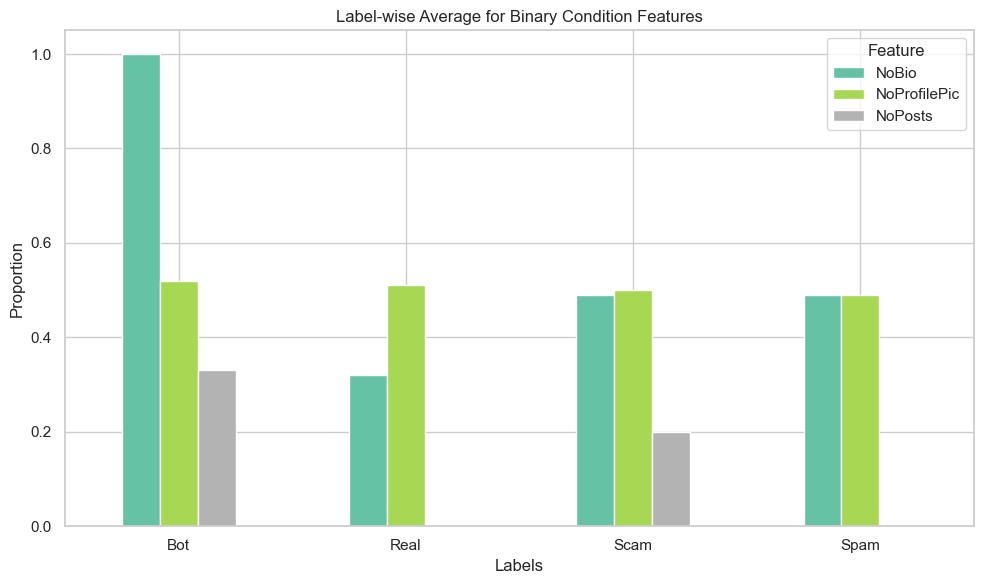

In [125]:
binary_features = ['NoBio', 'NoProfilePic', 'NoPosts']
binary_means = df.groupby('Labels')[binary_features].mean().round(2)

binary_means.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Label-wise Average for Binary Condition Features")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Feature")
plt.tight_layout()
plt.show()


**▶ Summary**

- Spam account has too many followers and distorted mean → Median/log conversion required
- Bot accounts have unusually large followings, most do not have Bio → heuristic filtering
- Real accounts meet most conditions and are highly active
- Scam accounts have fewer followers, but Follow Ratio is high → **Unusual follow strategy may be suspected**

Therefore, mean/median value, log transformation, condition variable utilization, etc. are very important in the **pre-modeling pre-search** process and can be used directly for Feature Engineering


# 6. Feature Extension Analysis 

## 6.1 Combined binary feature explanation

>- NoBio_NoPic: No bio AND no profile picture
>- NoPic_NoPost: No profile picture AND zero posts

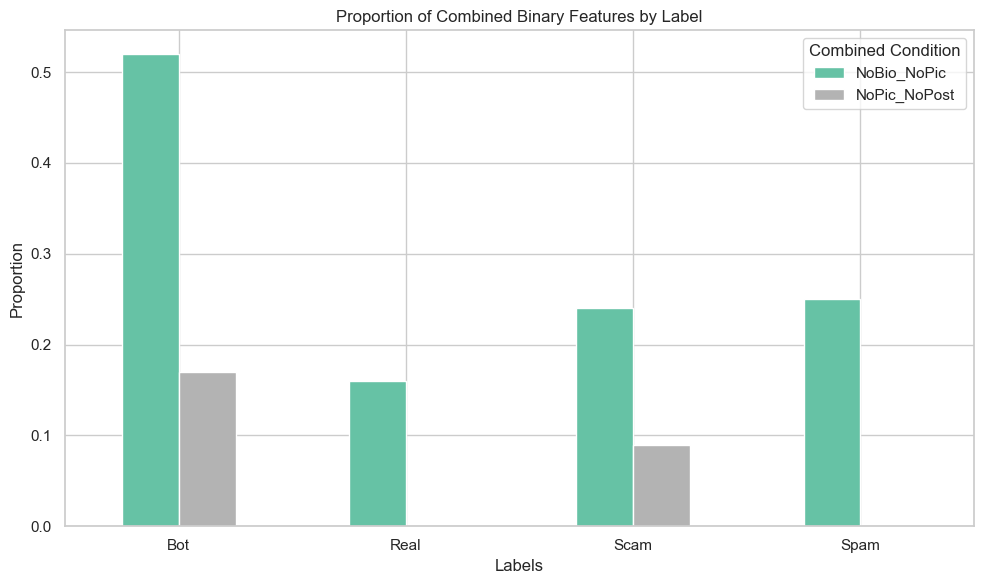

In [126]:

df['NoBio_NoPic'] = ((df['Bio'] == 'N') & (df['Profile Picture'] == 'N')).astype(int)
df['NoPic_NoPost'] = ((df['Profile Picture'] == 'N') & (df['Posts'] == 0)).astype(int)

# Grouped mean for label comparison
pair_features = ['NoBio_NoPic', 'NoPic_NoPost']
pair_means = df.groupby('Labels')[pair_features].mean().round(2)

# Visualization
pair_means.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Proportion of Combined Binary Features by Label")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Combined Condition")
plt.tight_layout()
plt.show()


## 6.2 Log-Transformed Ratio Features

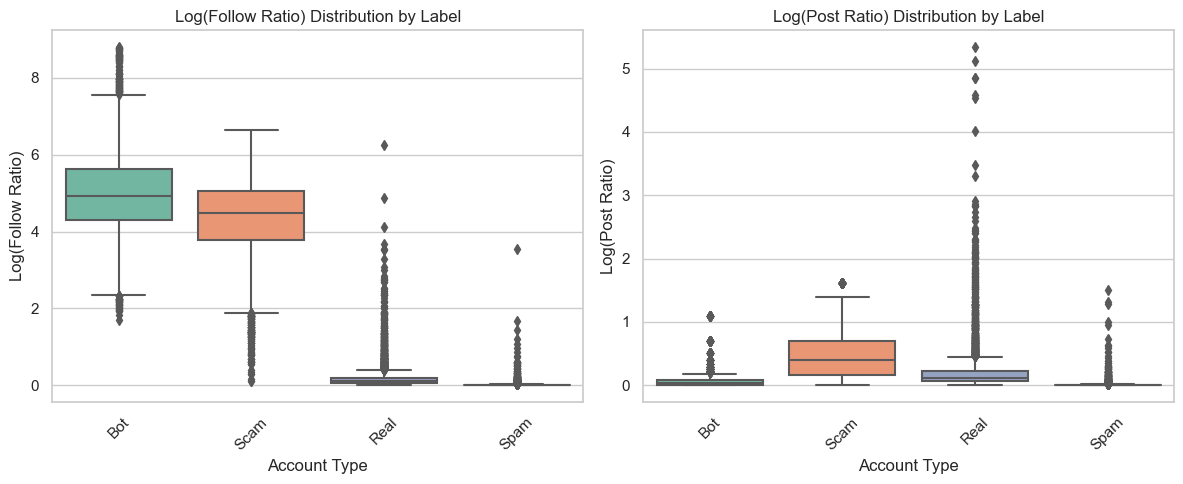

In [127]:
df['Log_Follow_Ratio'] = np.log1p(df['Follow_Ratio'])
df['Log_Post_Ratio'] = np.log1p(df['Post_Ratio'])

# visualize
plt.figure(figsize=(12, 5))


# Plot 1: Follow Ratio (log scale)
plt.subplot(1, 2, 1)
sns.boxplot(x='Labels', y='Log_Follow_Ratio', data=df, palette='Set2')
plt.title("Log(Follow Ratio) Distribution by Label")
plt.xlabel("Account Type")
plt.ylabel("Log(Follow Ratio)")
plt.xticks(rotation=45)

# Plot 2: Post Ratio (log scale)
plt.subplot(1, 2, 2)
sns.boxplot(x='Labels', y='Log_Post_Ratio', data=df, palette='Set2')
plt.title("Log(Post Ratio) Distribution by Label")
plt.xlabel("Account Type")
plt.ylabel("Log(Post Ratio)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**▶ Summary**
- NoBio_NoPic: If you don't have both Bio and profile pictures → Bot ratio overwhelming

- NoPic_NoPost: Neither Photos nor Post → Spam/Scam frequently

- Log-transformed ratio variables reduce outlier effects and enable comparability ↑

# 7. Model Comparison

## 7.1 Model Benchmarking

>To justify the final model selection, we benchmarked three models:
>- Logistic Regression (as a baseline)
>- Decision Tree (for interpretability)
>- Random Forest (as our main candidate)

Each model was evaluated using Accuracy, Precision, Recall, and F1-Score.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Feature and Label Setup
features = ['Followers', 'Following', 'Posts', 'Follow_Ratio', 'Post_Ratio', 'NoBio', 'NoProfilePic', 'NoPosts']
X = df[features]
y = df['Labels']

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Standardization for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
# 4. Model Training
## 4.1 Logistic Regression
lr_model = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

## 4.2 Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

## 4.3 Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# 5. Evaluation Function
def get_scores(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted'),
    }

# 6. Collect Results
results = []
results.append(get_scores(y_test, lr_pred, 'Logistic Regression'))
results.append(get_scores(y_test, dt_pred, 'Decision Tree'))
results.append(get_scores(y_test, y_pred, 'Random Forest'))

# 7. Display Results
results_df = pd.DataFrame(results).set_index('Model')
display(results_df)


,Accuracy,Precision,Recall,F1-Score
Model,,,,
Logistic Regression,0.940444,0.941386,0.940444,0.940416
Decision Tree,0.961556,0.961589,0.961556,0.961549
Random Forest,0.963111,0.963144,0.963111,0.963104


**▶ Summary**

- Random Forest outperformed all other models across all metrics (Accuracy, Precision, Recall, F1).

- Logistic Regression serves well as a baseline but lacks capacity for complex decision boundaries.

- Decision Tree is interpretable and fairly accurate but slightly unstable compared to Random Forest.

➡ Final Decision: Random Forest was selected as the final model for its strong overall performance and robustness.



## 7.2 Model Result ( Random Forest)

In [130]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# 1. Feature and Label Setup
features = ['Followers', 'Following', 'Posts', 'Follow_Ratio', 'Post_Ratio', 'NoBio', 'NoProfilePic', 'NoPosts']
X = df[features]
y = df['Labels']

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Prediction & Evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         Bot       0.99      0.99      0.99      1143
        Real       0.93      0.94      0.94      1156
        Scam       0.98      0.99      0.99      1112
        Spam       0.94      0.93      0.93      1089

    accuracy                           0.96      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.96      0.96      0.96      4500



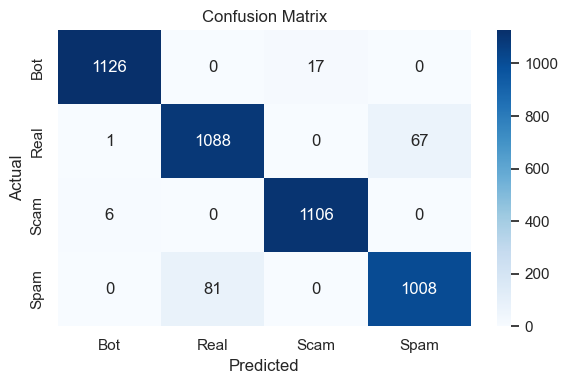

In [131]:
# 5. Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


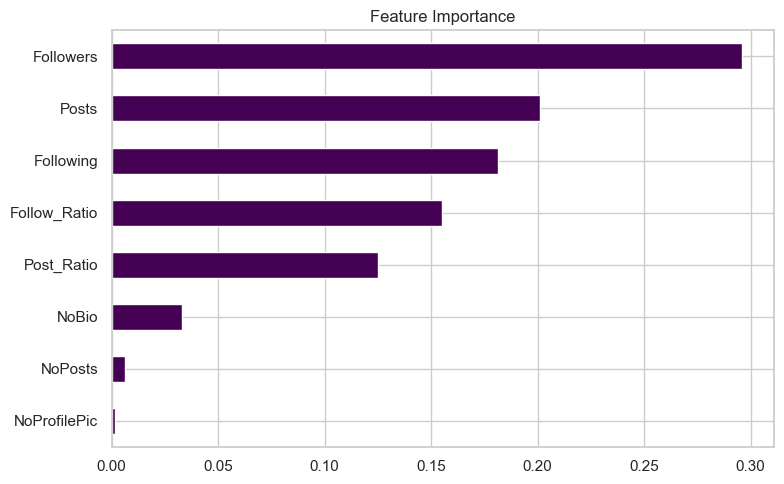

In [132]:
# 6. Feature Importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
importances.plot(kind='barh', figsize=(8, 5), colormap='viridis')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


## 7.3 Model Summary

- **Final Model**: We selected **Random Forest Classifier** as the final model due to its robust performance, achieving an overall accuracy of **96%**.
- **Confusion Matrix Analysis**: While the model accurately classified most categories, there was noticeable confusion between **Real** and **Spam** accounts, suggesting some behavioral overlap.
- **Key Features**:
  - `Followers` was the most important predictor based on feature importance scores.
  - Other influential features included `Posts`, `Following`, and `Follow_Ratio`.
- **Binary Condition Features** such as `NoBio` and `NoPosts` were particularly useful in identifying suspicious or passive accounts (e.g., bots), supporting rule-based detection strategies.




# 8.  Final Conclusion

With an overall accuracy of **96%**, the Random Forest model proved to be the most effective in classifying Instagram accounts into **Real**, **Bot**, **Scam**, and **Spam** categories.

Key takeaways:

- **Ratio-based features** such as `Follow_Ratio` and `Post_Ratio` helped normalize behavioral patterns across different account scales.
- **Binary heuristics** (e.g., no bio, no profile picture) were effective in flagging potentially suspicious accounts.
- The model's performance, combined with interpretable feature importances, supports its use in practical detection systems.

➡ **Conclusion**: Combining numerical ratios with condition-based rules allows for **accurate and explainable classification** of Instagram accounts — a promising approach for detecting low-quality or fraudulent behavior on social platforms.
